# 숫자 문자열과 영단어

시간 : 5분

In [60]:
s = "23four5six7"

In [63]:
def solution(s):
    numbers = {'0':'zero', '1':'one', '2':'two', '3':'three', '4':'four', '5':'five', '6':'six', '7':'seven', '8':'eight', '9':'nine'}
    for key, value in numbers.items():
        if value in s:
            s = s.replace(value, key)
    return int(s)

In [64]:
solution(s)

234567

# 거리두기 확인하기

시간 : 1시간


## 문제 설명

1. 대기실은 5개이며, 각 대기실은 5x5 크기입니다.
2. 거리두기를 위하여 응시자들 끼리는 <u>맨해튼 거리</u>가 2 이하로 앉지 말아 주세요.
    - 두 테이블 T1, T2가 행렬 (r1, c1), (r2, c2)에 각각 위치하고 있다면, T1, T2 사이의 맨해튼 거리는 |r1 - r2| + |c1 - c2| 입니다
3. 단 응시자가 앉아있는 자리 사이가 파티션으로 막혀 있을 경우에는 허용합니다.

- P: 응시자가 앉아있는 자리
- O: 빈 테이블
- X: 파티션

대기실별로 거리두기를 지키고 있으면 : 1    
한 명이라도 지키지 않고 있으면: 0

## Solution 
응시자는 최대 25명임으로 모든 거리를 구해도 시간제한(10초) 통과 -> 조합 : $O(2^N)$

1. 맨해튼 거리가 3 이상이면 무조건 거리두기 지킨 것(1)
2. 1인 경우는 무조건 거리두기 지키지 않은 것(0)
3. 2인 경우는 두 응시자 사이에 파티션 존재하는지에 따라 다름
    - 파티션으로 막혀있으면 지킨 것(1) 
    - 막혀있지 않으면 지키지 않은 것(0)

## 문제 정리
- 처음에 제출한 코드에서 16번 31번 테스트 케이스 통과 x
- 응시자 둘이 대각선으로 앉았을 때를 나눠서 생각하지 않음(무조건 오른쪽 아래 방향 대각선으로만 생각하고 코드 작성)
    - 오른쪽 아래 방향 대각선으로 앉았을 때는 반대 방향 대각선을 확인
    - 왼쪽 아래 방향 대각선으로 앉았을 때 역시 반대 방향 대각선을 확인

In [166]:
places = [["POOOP", "OXXOX", "OPXPX", "OOXOX", "POXXP"], ["POOPX", "OXPXP", "PXXXO", "OXXXO", "OOOPP"], ["PXOPX", "OXOXP", "OXPOX", "OXXOP", "PXPOX"], ["OOOXX", "XOOOX", "OOOXX", "OXOOX", "OOOOO"], ["PXPXP", "XPXPX", "PXPXP", "XPXPX", "PXPXP"]]

In [167]:
from itertools import combinations
def solution(places):
    result = []

    for row in places:
        # 응시자가 앉은 위치 모두 기록
        applicant = []
        for i in range(5):
            for j in range(5):
                if row[i][j] == 'P':
                    applicant.append([i, j])

        ans = 1
        for t1, t2 in list(combinations(applicant, 2)): # 지원자들 사이의 거리 경우의 수
            (r1, c1), (r2, c2) = t1, t2
            dist = abs(r1 - r2) + abs(c1 - c2)

            # 1. 맨해튼 거리가 1 일 때는, 무조건 거리두기를 지키고 있지 않음.
            if dist == 1:
                ans = 0
                break
            # 2. 맨해튼 거리가 2일 경우, 파티션으로 막혀있는지 확인 필요!
            if dist == 2:
                # 두 지원자 사이에 파티션(X) 필요
                # 1) 같은 행에 있는 경우
                if r1 == r2: 
                    if row[r1][min(c1, c2) + 1] != 'X':
                        ans = 0
                        break
                # 2) 같은 열에 있는 경우
                if c1 == c2:
                    if row[min(r1, r2) + 1][c1] != 'X':
                        ans = 0
                        break
                # 3) 행과 열이 다른 경우
                if r1 != r2 and c1 != c2:
                    # 오른쪽 아래로 대각선 방향에 앉은 경우
                    if (r1 > r2 and c1 > c2) or (r2 > r1 and c2 > c1):
                        if row[min(r1, r2)][max(c1, c2)] == 'O' or row[max(r1, r2)][min(c1, c2)] == 'O':
                            ans = 0
                            break
                    # 왼쪽 위로 대각선 방향에 앉은 경우
                    else:
                        if row[min(r1, r2)][min(c1, c2)] == 'O' or row[max(r1, r2)][max(c1, c2)] == 'O':
                            ans = 0
                            break

        result.append(ans)
        
    return result

In [168]:
solution(places)

[1, 0, 1, 1, 1]

## 다른 사람 풀이

In [171]:
from collections import deque

def bfs(p, idx):
    q = deque([idx])
    visited = [[False]*5 for _ in range(5)]
    dic = {0: [0, -1], 1:[-1, 0], 2:[0, 1], 3:[1, 0]}
    
    while q:
        x, y, d = q.popleft()
        visited[x][y] = True
        
        for i in range(4): # 지원자가 있는 지점(노드)에서 상하좌우 확인
            nx = x + dic[i][0]
            ny = y + dic[i][1]
            nd = d + 1

            if 0 <= nx < 5 and 0 <= ny < 5 and not visited[nx][ny]: # 범위내에 방문하지 않은 지역
                visited[nx][ny] = True # 방문 처리
                
                if p[nx][ny] == 'P': # 또 다른 지원자
                    if nd <= 2: # 거리가 2 이하이면 거리두기 x
                        return False

                elif p[nx][ny] == 'O': # 빈 테이블
                    if nd == 1: # 거리가 1이면 다시 탐색
                        q.append([nx, ny, nd])

    return True
                    
def solution(places):
    answer = []
    
    for place in places:
        flag = 1
        for i in range(5):
            for j in range(5):
                if place[i][j] == 'P':
                    result = bfs(place, [i, j, 0])
                    if not result:
                        flag = 0
                        
        answer.append(flag)
        
    return answer

In [172]:
solution(places)

[1, 0, 1, 1, 1]

# 표 편집
시간: 1시간 30분 (실패) -> 해설 보고 다시 코드 작성

## 문제 설명
- 한 번에 한 행만 선택할 수 있음.
- 표의 범위를 벗어날 수 없음(0행 ~ 마지막 행)

- "U X": 현재 선택된 행에서 X칸 위에 있는 행을 선택합니다.
- "D X": 현재 선택된 행에서 X칸 아래에 있는 행을 선택합니다.
- "C" : 현재 선택된 행을 삭제한 후, 바로 아래 행을 선택합니다. 단, 삭제된 행이 - 가장 마지막 행인 경우 바로 윗 행을 선택합니다.
- "Z" : 가장 최근에 삭제된 행을 원래대로 복구합니다. 단, 현재 선택된 행은 바뀌지 않습니다.

"U X", "D X", "C", "Z"  
- n: 처음 표의 행 개수를 나타내는 정수 -> n은 최대 100만: ($O(N)$ or $O(logN)$)
- k: 처음에 선택된 행의 위치를 나타내는 정수
- cmd: 수행한 명령어들이 담긴 문자열 배열

삭제되지 않은 행은 O, 삭제된 행은 X로 표시하여 문자열 형태로 return

In [173]:
n = 8
k = 2
cmd = ["D 2","C","U 3","C","D 4","C","U 2","Z","Z","U 1","C"]
cmd = ["D 2","C","U 3","C","D 4","C","U 2","Z","Z"]

## 처음 구현한 틀린 코드
- 1시간 30분. 계속 오답처리돼서 카카오 해설 참고
- 효율성은 다 통과 안되고, 정확성에서도 틀린 케이스가 더 많음.

In [174]:
def solution(n, k, cmd):
    # 행의 삭제 여부
    removed = ['O'] * n
    # 삭제된 행
    stack = []
    arr = list(range(n))
    # 현재 위치한 행
    now = k

    for i in cmd:
        oper = i.split()
        if oper[0] == 'D':
            now += int(oper[1])
        elif oper[0] == 'U':
            now -= int(oper[1])
        elif oper[0] == 'C':
            # 1) 선택된 행 삭제 여부 저장
            removed[now] = 'X'
            # 2) 삭제되는 행이 가장 마지막 행인지 확인
            # 2-1) 가장 마지막 행이면, 바로 위 행으로 이동
            if now == len(arr)-1:
                stack.append([now,arr.pop(now)]) # 복구를 위해 인덱스 번호도 같이 스택에 저장
                now -= 1
            # 2-2) 가장 마지막 행이 아니면, 바로 아래 행으로 이동
            else:
                stack.append([now,arr.pop(now)]) # 복구를 위해 인덱스 번호도 같이 스택에 저장
        elif oper[0] == 'Z':
            idx, name = stack.pop()
            removed[idx] = 'O'
            arr.insert(idx, name)
            if idx < now:
                now += 1

    return ''.join(removed)

In [175]:
solution(n, k, cmd)

'OOOOXOOO'

## 문제 정리

**카카오 문제 풀이를 참고해서 다시 푼 코드**
- U, D: 선택된 노드에서 X 번만 링크를 따라가면 되기 때문에 O(X)에 처리할 수 있습니다.
- C: 선택된 노드와 그 노드의 앞뒤로 연결된 노드들의 링크 정보만 변경해 주면 되기 때문에 O(1)에 처리할 수 있습니다.
- Z: 삭제된 노드 정보를 스택에 담아 두면 나중에 해당 노드에 O(1)에 접근하여 링크 정보를 복구해 줄 수 있기 때문에 O(1)에 처리할 수 있습니다.

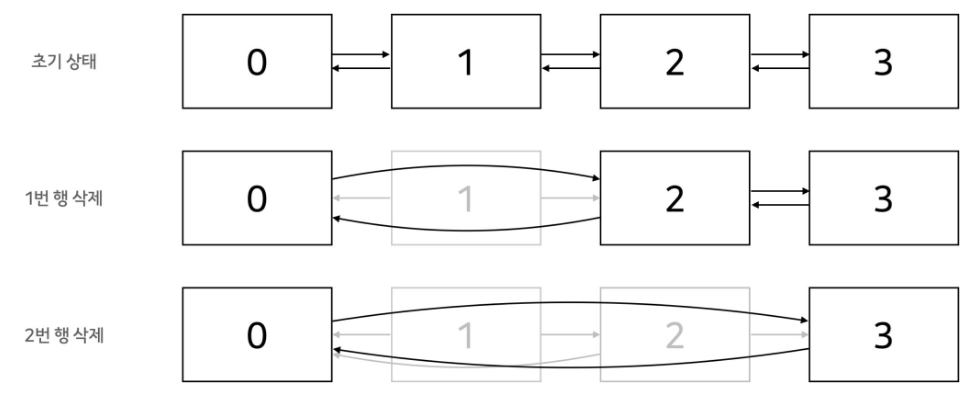

In [34]:
class Node:
    def __init__(self, prev=None, next=None):
        self.num = 0
        self.removed = False
        self.prev = prev
        self.next = next        

def solution(n, k, cmd):
    linked_list = [Node() for _ in range(n)] # 연결 리스트 초기화
    stack  =[]
    # 노드끼리 연결(이중 연결 리스트) - 양방향으로 연결되어 있어서 노드 탐색이 양쪽으로 모두 가능
    for i in range(1,n):
        linked_list[i].num = i
        linked_list[i-1].next = linked_list[i]
        linked_list[i].prev = linked_list[i-1]
    
    current = linked_list[k] # 현재 위치
    
    for command in cmd:
        option = command[0]
        if (option == 'U'): # 위로 이동
            amount = int(command.split(" ")[1])
            for i in range(amount):
                current = current.prev
        elif (option == 'D'): # 아래로 이동
            amount = int(command.split(" ")[1])
            for i in range(amount):
                current = current.next
        elif (option == 'C'): # 삭제
            stack.append(current.num) # 삭제한 인덱스 번호 저장
            current.removed= True # 삭제 여부
            
            if(current.prev): # 맨 앞 노드가 아닐 때, 앞뒤로 연결된 노드들의 링크 정보만 변경해 주면 되기 때문에 O(1)
                current.prev.next = current.next
            if(current.next): # 맨 뒤 노드가 아닐 때, 앞뒤로 연결된 노드들의 링크 정보만 변경해 주면 되기 때문에 O(1)
                current.next.prev = current.prev
                current = current.next
            else: # 마지막 노드를 삭제하는 경우, 바로 윗 행 선택(이전 노드)
                current = current.prev
            
        elif (option == 'Z'): # 복구
            pop = stack.pop() # O(1)
            restore = linked_list[pop] 
            restore.removed = False
            if(restore.prev):
                restore.prev.next = restore
            if(restore.next):
                restore.next.prev = restore
            
    answer =''
    for item in linked_list:
        if item.removed:
            answer+='X'
        else:
            answer+='O'
        
    return answer